# Импорт библиотек


In [6]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

# Загружаем файлик


In [7]:
uploaded = files.upload()

NameError: ignored

Считываем файл и дальше чет делаем с ним


# Анализ данных

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/bob4inski/sirius-ml/main/datasets/studentInfo.csv',  delimiter = ',')
df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


## Получение базовой инфы

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [10]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


## Графики еее
тут просто тестики разные

In [11]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно

# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))
# Но нам не нужен столбец id_student, так что его выкинем
num_columns = num_columns[1:]
print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result'] 
 Число столблцов =  9
Числовые данные:	  ['num_of_prev_attempts', 'studied_credits'] 
 Число столблцов =  2


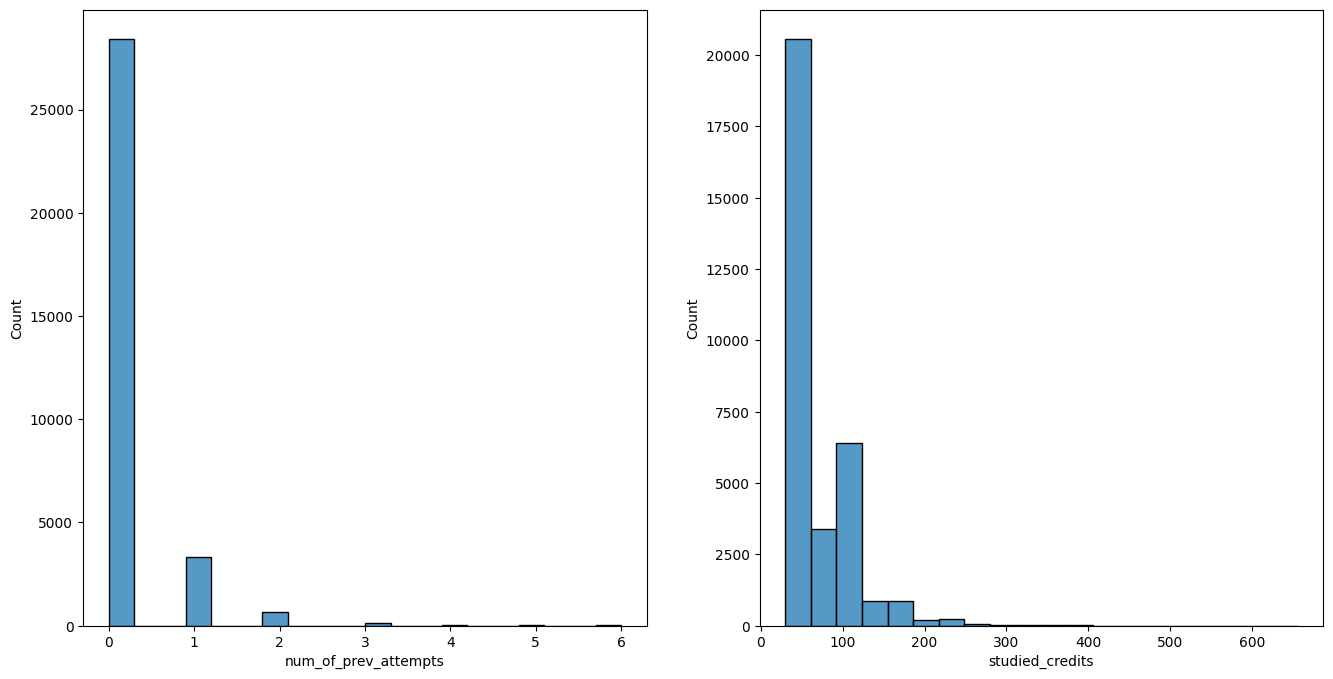

In [12]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем

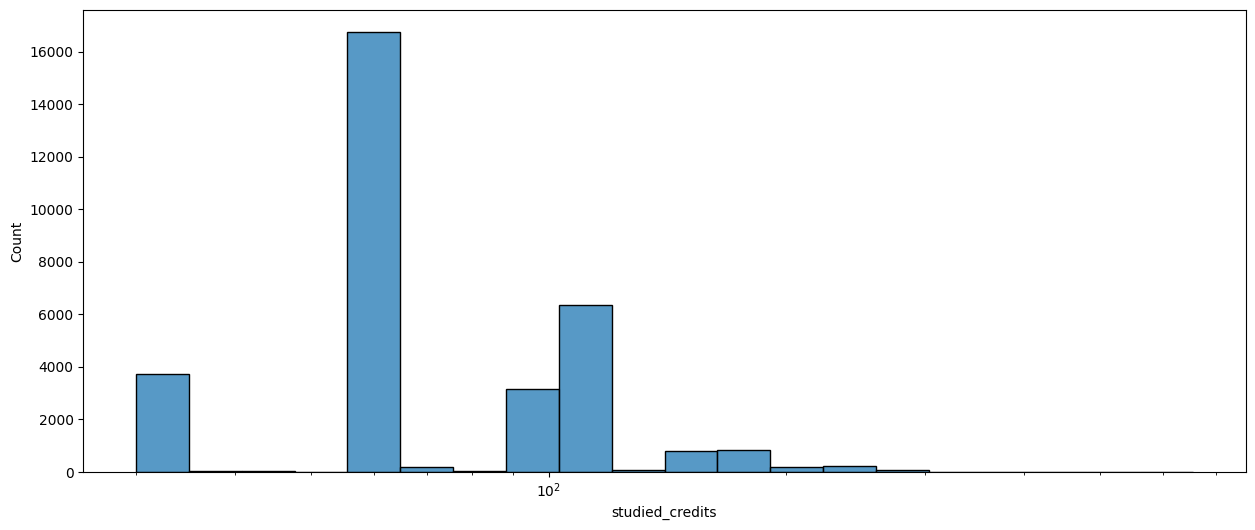

In [13]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='studied_credits', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

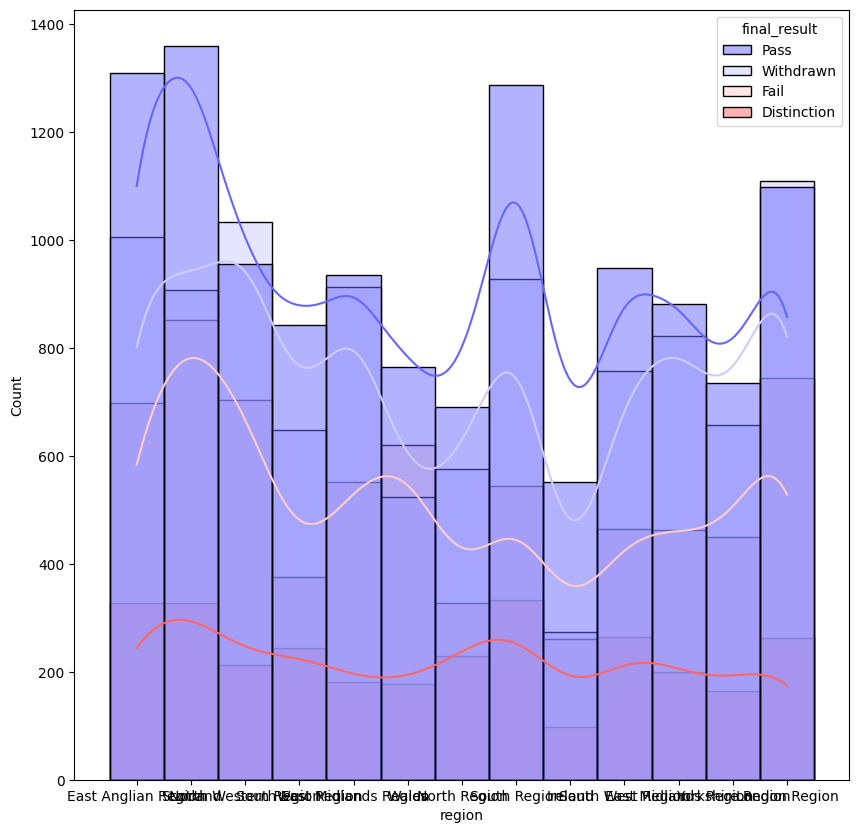

In [14]:
fig = plt.figure(figsize=(10,10))
sns.histplot(data = df,  # какой датафрей используем
             x = "region",
             hue ='final_result',
             bins = 15, kde = True,# Рекомендуется использовать Категориальные данные (не очень много уникальных значений)
             palette = 'bwr',);

# Анализ категориальных признаков

In [15]:
df[cat_columns].nunique()

code_module           7
code_presentation     4
gender                2
region               13
highest_education     5
imd_band             10
age_band              3
disability            2
final_result          4
dtype: int64

Такое количество уникальных значений для каждого категориального признака говорит о том, что сами данные уже в целом отформатированы и нормализация не требуется (глазками посмотрел всё ок)


Простое кодирование категориальных признаков

In [16]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category') # задаем тип

for _, column_name in enumerate(cat_columns): # перебираем все колонки
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info() # по типам данных видно что пропали Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   code_module           32593 non-null  int8 
 1   code_presentation     32593 non-null  int8 
 2   id_student            32593 non-null  int64
 3   gender                32593 non-null  int8 
 4   region                32593 non-null  int8 
 5   highest_education     32593 non-null  int8 
 6   imd_band              32593 non-null  int8 
 7   age_band              32593 non-null  int8 
 8   num_of_prev_attempts  32593 non-null  int64
 9   studied_credits       32593 non-null  int64
 10  disability            32593 non-null  int8 
 11  final_result          32593 non-null  int8 
dtypes: int64(3), int8(9)
memory usage: 1.0 MB


In [17]:
df_se.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,1,11391,1,0,1,9,2,0,240,0,2
1,0,1,28400,0,6,1,2,1,0,60,0,2
2,0,1,30268,0,5,0,3,1,0,60,1,3
3,0,1,31604,0,7,0,5,1,0,60,0,2
4,0,1,32885,0,11,2,5,0,0,60,0,2


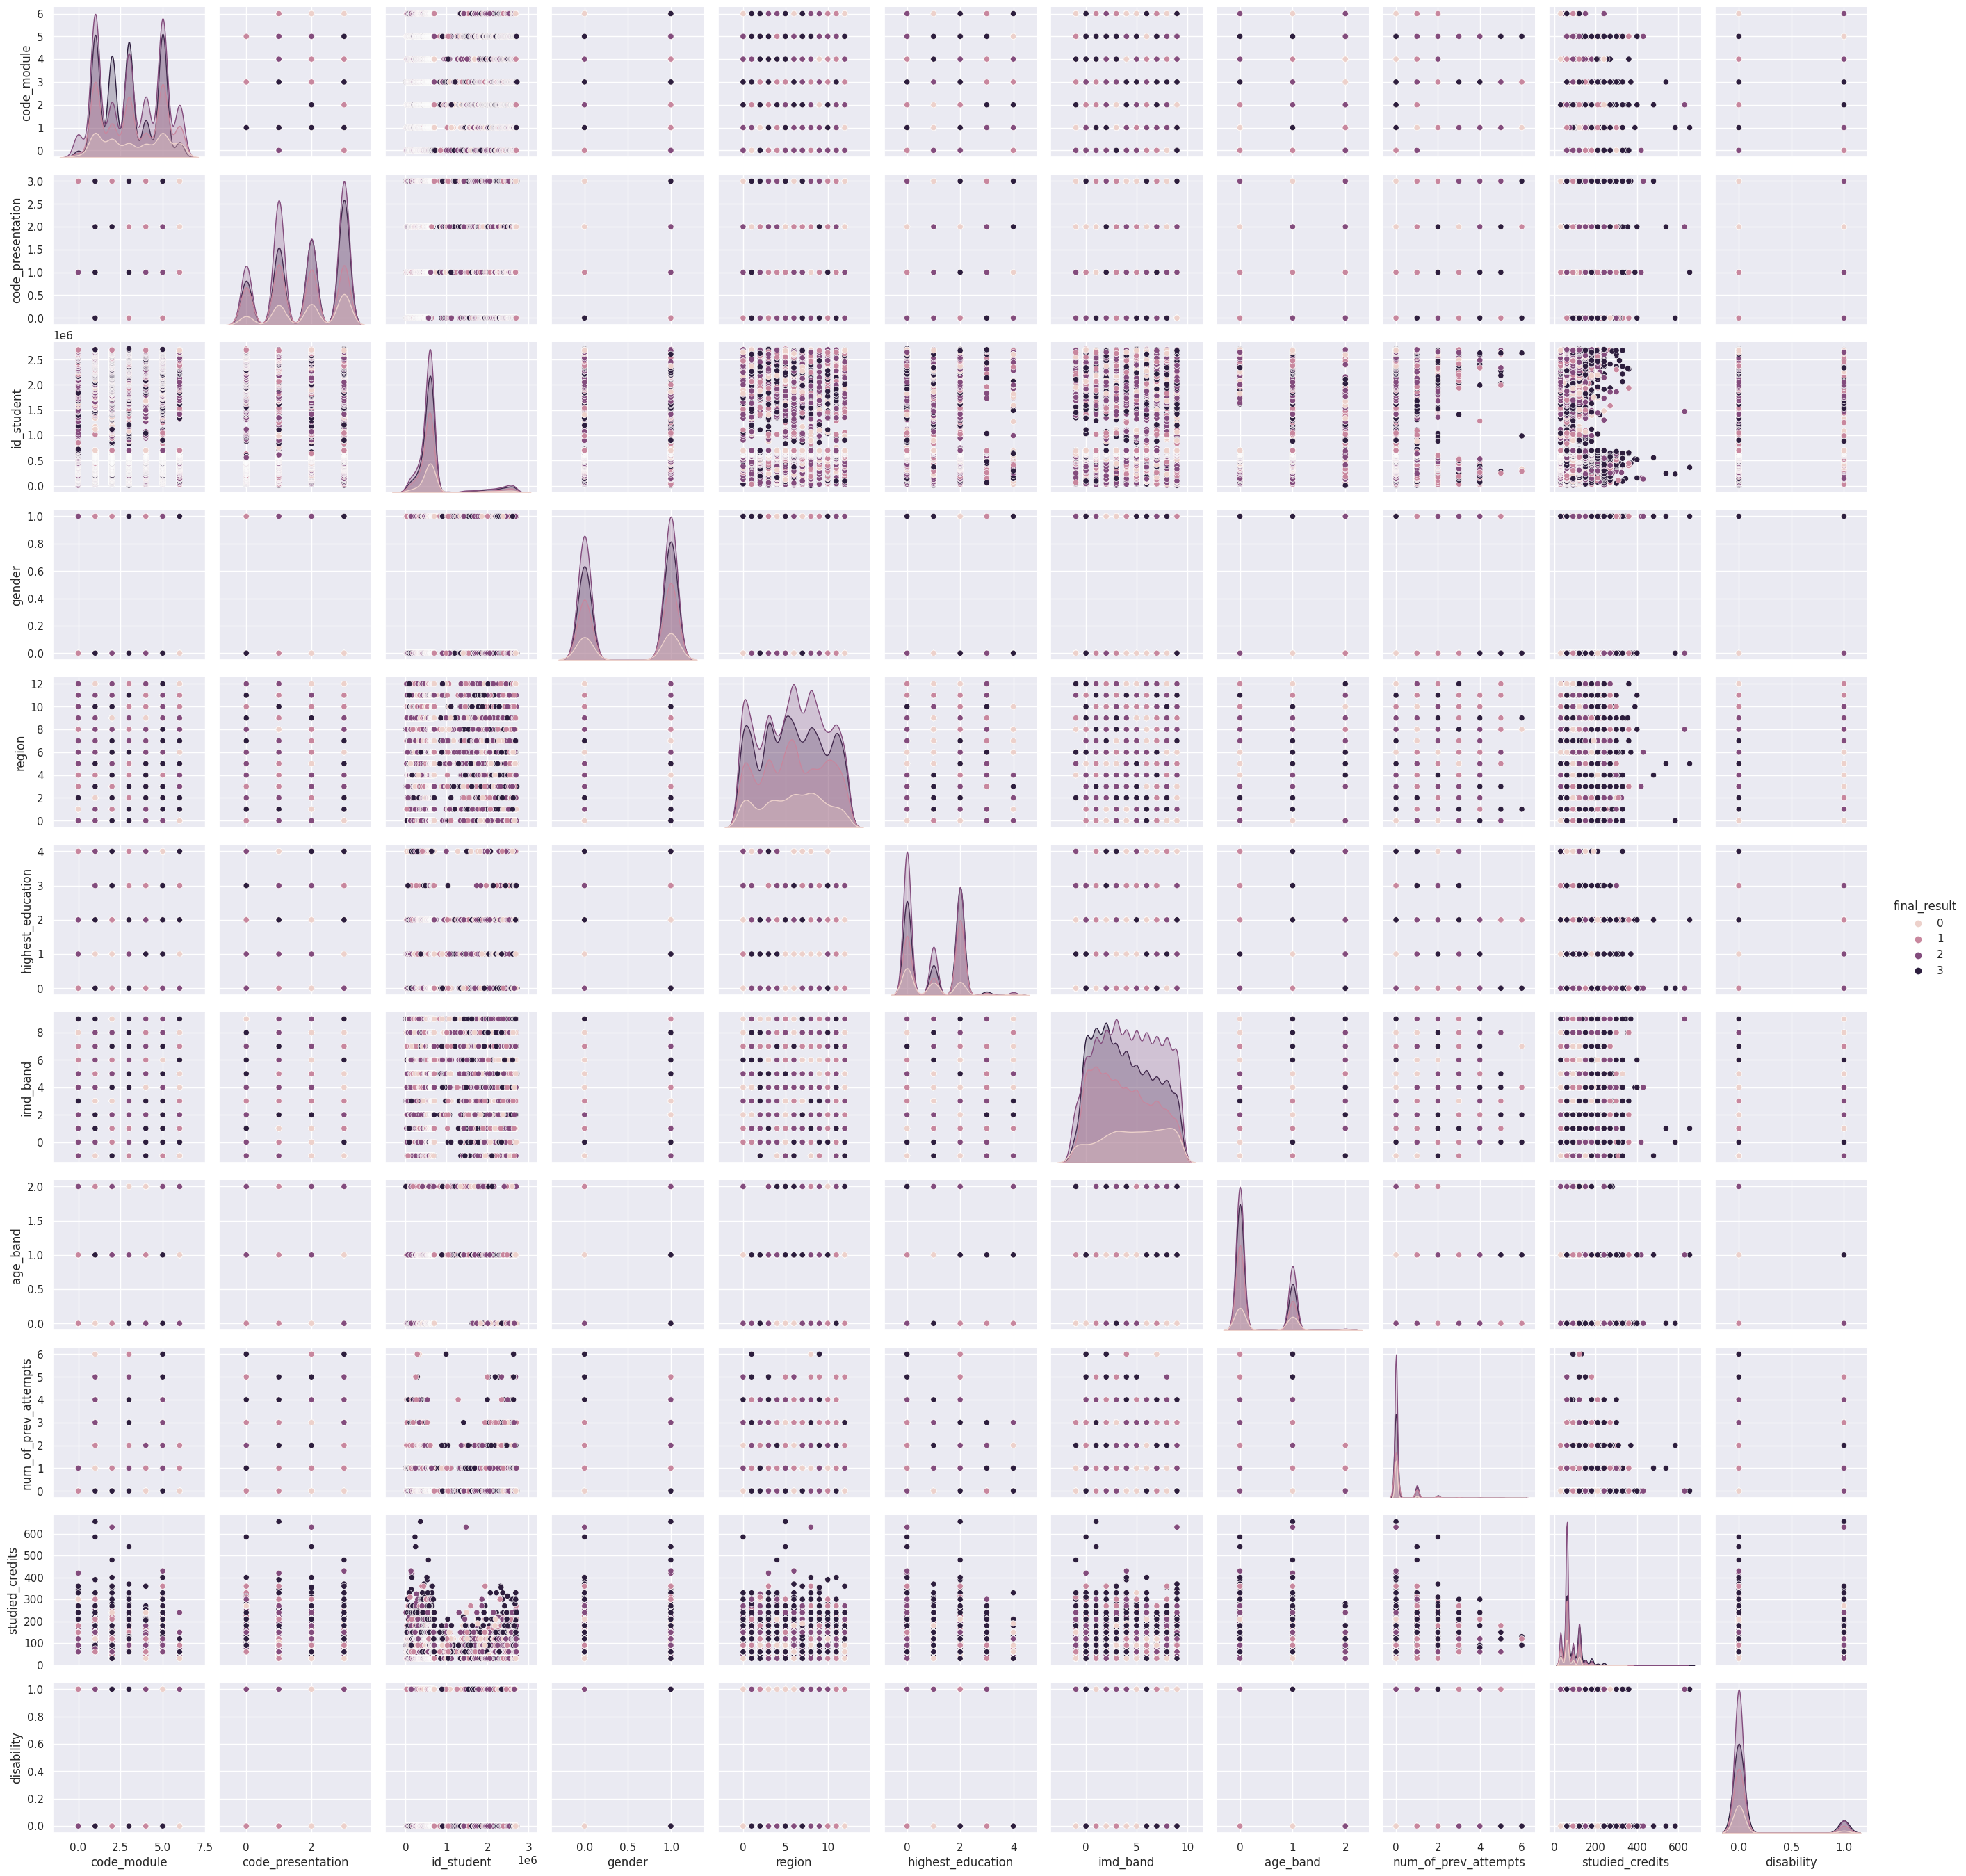

In [ ]:
sns.pairplot(data = df_se, hue ='final_result')

## one-hot кодирование


In [18]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   id_student                                     32593 non-null  int64
 1   num_of_prev_attempts                           32593 non-null  int64
 2   studied_credits                                32593 non-null  int64
 3   code_module_AAA                                32593 non-null  uint8
 4   code_module_BBB                                32593 non-null  uint8
 5   code_module_CCC                                32593 non-null  uint8
 6   code_module_DDD                                32593 non-null  uint8
 7   code_module_EEE                                32593 non-null  uint8
 8   code_module_FFF                                32593 non-null  uint8
 9   code_module_GGG                                32593 non-null  uint8
 10

# Предварительная обработка числовых признаков
но в моем случае это делать конечно не надо, тк уже набор данных нормализован и стандартизирован

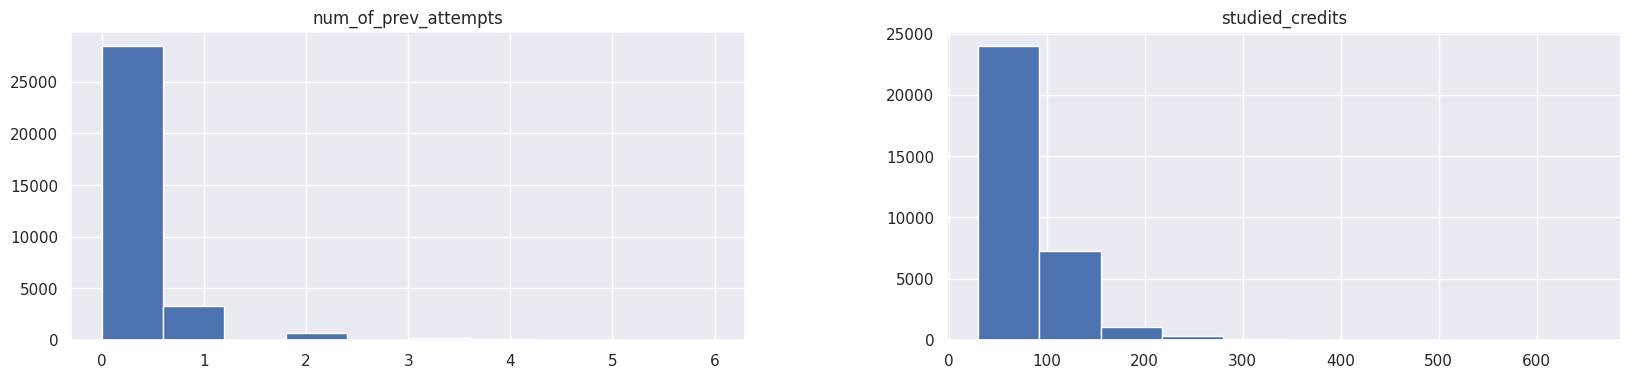

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20,  4))# создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет 1 строка и 4 столбца

df.hist(column = num_columns, ax = axs );

### Стандартизация


In [ ]:
scale = StandardScaler()

scale.fit(df[num_columns]);
scale.mean_, scale.scale_

(array([ 0.16322523, 79.75869052]), array([ 0.47975111, 41.07127018]))

Трансформируем и пакуем в новый датафрейм


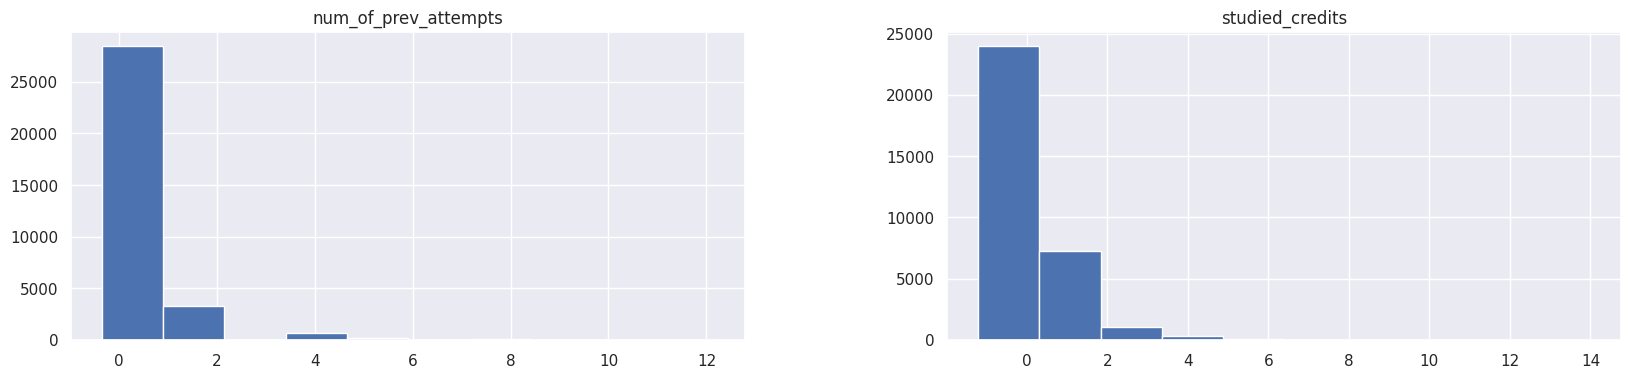

In [ ]:
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard.hist(figsize = (20,4), layout= (1,2));

### Нормализация

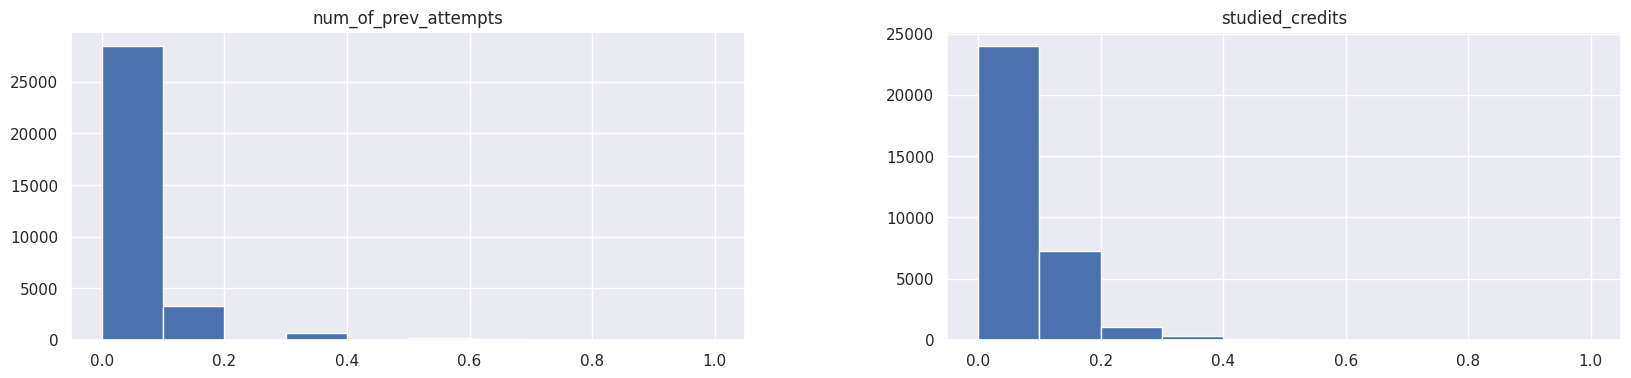

In [ ]:
norm = MinMaxScaler()

norm.fit(df[num_columns]);
normolized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normolized, columns= num_columns)
df_norm.hist(figsize = (20,4), layout= (1,2));


# Предварительная обработка категориальных признаков


### Порядковое кодирование

In [19]:
ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
0,0.0,1.0,1.0,0.0,1.0,9.0,2.0,0.0,2.0
1,0.0,1.0,0.0,6.0,1.0,2.0,1.0,0.0,2.0
2,0.0,1.0,0.0,5.0,0.0,3.0,1.0,1.0,3.0
3,0.0,1.0,0.0,7.0,0.0,5.0,1.0,0.0,2.0
4,0.0,1.0,0.0,11.0,2.0,5.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
32588,6.0,3.0,0.0,10.0,2.0,1.0,0.0,0.0,1.0
32589,6.0,3.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0
32590,6.0,3.0,0.0,8.0,0.0,2.0,0.0,1.0,2.0
32591,6.0,3.0,0.0,7.0,2.0,9.0,1.0,0.0,3.0


### One-hot кодирование


In [ ]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)
ohe.fit(df[cat_columns]);
ohe_feat = ohe.transform(df[cat_columns])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

df_ohe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,...,imd_band_90-100%,imd_band_nan,age_band_0-35,age_band_35-55,age_band_55<=,disability_Y,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
32589,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
32590,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
32591,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


Число повторений в кадом категориальном признаке

In [ ]:
df[cat_columns].nunique()

code_module           7
code_presentation     4
gender                2
region               13
highest_education     5
imd_band             10
age_band              3
disability            2
final_result          4
dtype: int64

Данные итак уже очень хорошо обработаны, очень мало уникальных значений. Поэтому и не нужно как-то резать объем данных

Но я попробую и почти ничего не поменяется


In [ ]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [ ]:
rg = RareGrouper(threshold=0.001, other_value='rare')
DF_cat_rare = rg.fit_transform(df[cat_columns])
DF_cat_rare.nunique()

code_module           7
code_presentation     4
gender                2
region               13
highest_education     5
imd_band             11
age_band              3
disability            2
final_result          4
dtype: int64

# Логическая Регрессия

Что такое целевой параметр - параметр, который мы хотим предсказать

In [ ]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

v  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

Тут мы разделили даныне на тестовую часть и валидационную
Целевая переменная у нас нормализированная и всё ок, так что думаю ее трогать не стоит


In [ ]:
# не забываем удалить целевую переменную цену из признаков
X,y = df.drop(columns = ['final_result']), df['final_result']

# разбиваем на тестовую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=42)

In [ ]:
X_train

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
16881,DDD,2014B,597379,M,North Western Region,Lower Than A Level,20-30%,0-35,0,120,N
6751,BBB,2014J,530772,F,Wales,A Level or Equivalent,20-30%,35-55,0,60,N
870,BBB,2013B,237304,M,North Region,A Level or Equivalent,0-10%,0-35,0,60,N
19741,EEE,2013J,560924,M,South West Region,Lower Than A Level,30-40%,0-35,0,60,N
9104,CCC,2014B,479714,M,Yorkshire Region,Lower Than A Level,60-70%,0-35,0,90,N
...,...,...,...,...,...,...,...,...,...,...,...
29802,FFF,2014J,696662,F,South West Region,A Level or Equivalent,60-70%,0-35,0,120,N
5390,BBB,2014B,589862,F,North Western Region,Lower Than A Level,40-50%,0-35,0,120,N
860,BBB,2013B,226827,F,South East Region,A Level or Equivalent,40-50%,0-35,0,60,N
15795,DDD,2013J,595687,M,Scotland,A Level or Equivalent,20-30%,0-35,0,60,N


 #### Пайплайны

In [125]:
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn



# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder#


class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

def num_pipes(num_columns: list):

    result = []

    for num in num_columns:

        column_name = f'num_{num}'
        pipe = Pipeline([
            ('scaler', StandardScaler())
        ])

        pre_result = (column_name, pipe, [num])
        result.append(pre_result)

    return result

def cat_pipes(cat_columns: list):

    result = []

    for cat in cat_columns:

        column_name = f'cat_{cat}'
        pipe = Pipeline([
            ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
            ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
        ])

        pre_result = (column_name, pipe, [cat])
        result.append(pre_result)

    return result[:-1]


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import SGDRegressor

X,y = df.drop(columns = ['final_result']), df['final_result']



X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=42)


preprocessors_num = ColumnTransformer(transformers=num_pipes(num_columns))
all_list = num_pipes(num_columns) + cat_pipes(cat_columns)

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=all_list)

pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=StandardScaler())
    )
])
nums = num_pipes(num_columns)

columns_num = np.hstack([nums[0][0],
                    nums[1][0]])

columns_num

array(['num_num_of_prev_attempts', 'num_studied_credits'], dtype='<U24')

In [127]:
from sklearn.preprocessing import LabelEncoder


Label = LabelEncoder()
Label.fit(y) # задаем столбец, который хотим преобразовать
target = Label.transform(y)
#Преобразовали и дальше
# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, target,
                                                    test_size=0.3,
                                                    random_state=42)


## Оценим данные чисто с помощью числовых

In [88]:
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

Обучаем модельку


In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)

model.fit(X_train_prep, y_train);

### Много букав про функции не будет
просто наглая копипаста функций из мануалов


In [128]:
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px

def get_coefs (model):
    """Берем веса как атрибуты обученной модели.
    Входные переменные:
    ===========
    model: обученная модель
    """
    B0=model.intercept_[0]
    B=model.coef_[0]
    return B0, B



def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()



### Пишем уравнение модели


In [91]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
-0.903-0.27*num_num_of_prev_attempts-0.14*num_studied_credits


In [92]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

### Оценка полученных метрик
вывод - числовые метрики у нас - не очень информативные

In [99]:
from sklearn.metrics import f1_score # f1-мера от Scikit-learn
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


def calculate_metric(model_pipe, X, y, metric = f1_score):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (f1 - по умолчанию)
    """
    y_model = model_pipe.predict(X)

    return metric(y, y_model)

print(classification_report(y_val, model.predict(X_val_prep), target_names=Label.classes_))
print(f"f1 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

              precision    recall  f1-score   support

 Distinction       0.00      0.00      0.00       928
        Fail       0.36      0.02      0.05      2203
        Pass       0.41      0.77      0.53      3688
   Withdrawn       0.42      0.38      0.39      2959

    accuracy                           0.41      9778
   macro avg       0.29      0.29      0.24      9778
weighted avg       0.36      0.41      0.33      9778



ValueError: ignored

## Оценка Категориальных признаков

In [129]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', LogisticRegression(random_state = 42))
    ])

pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_num_of_prev_attempts',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['num_of_prev_attempts']),
                                                 ('num_studied_credits',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['studied_credits']),
                                                 ('cat_code_module',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   On...
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['age_band']),
                                                 ('cat_disability',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['disability'])])),
                ('model', LogisticRegression(random_state=42))])

О как красиво получилось, теперь надо сделать из этого конфетку
Побольше автоматизации :0


In [130]:
all_l = []
for row in all_list:
    all_l.append(row[0])
columns = np.hstack(all_l)
columns

array(['num_num_of_prev_attempts', 'num_studied_credits',
       'cat_code_module', 'cat_code_presentation', 'cat_gender',
       'cat_region', 'cat_highest_education', 'cat_imd_band',
       'cat_age_band', 'cat_disability'], dtype='<U24')

#### Получаем формулу, которая будет капец какая длинная

In [131]:
B0, B = get_coefs(pipe_all['model'])
features_names = list(columns)

print_model(B0,B,features_names)

Решение
-0.333-0.25*num_num_of_prev_attempts-0.05*num_studied_credits-0.59*cat_code_module+0.04*cat_code_presentation-0.05*cat_gender-0.36*cat_region+0.15*cat_highest_education-0.02*cat_imd_band+0.57*cat_age_band-0.15*cat_disability


#### Зеленый номер 5 ахахахах, я художник (график новый)

In [142]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold

    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # print(len(weights_filtered))
    # print(weights_filtered)
    # print(len(feature_names_filtered))

    # # Рисуем столбчатую диаграмму
    # vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)
    # так должно быть
    vis_weigths(weights_filtered[:len(feature_names_filtered)],feature_names_filtered, width = width, height = height)




In [143]:
Bs = np.hstack([B0,B])

vis_weigths_threshold(Bs,columns, 0.01,  width = 1600, height=600)